In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-dataset-to-predict-a-delay/Airlines.csv


# LOAD DATA AND EDA

In [9]:
df = pd.read_csv('/kaggle/input/airlines-dataset-to-predict-a-delay/Airlines.csv')

In [10]:
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [12]:
df.isna().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [13]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [14]:
df.drop(['id'], axis=1, inplace=True)

# NUMERICAL DATA VISUALIZATION

In [15]:
df.columns

Index(['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time',
       'Length', 'Delay'],
      dtype='object')

<AxesSubplot:>

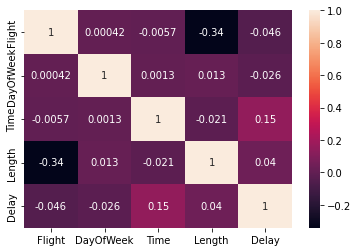

In [16]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Flight', ylabel='Count'>

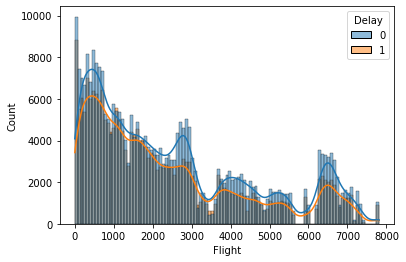

In [17]:
sns.histplot(data=df, x='Flight', hue='Delay', kde=True)

<AxesSubplot:xlabel='Time', ylabel='Count'>

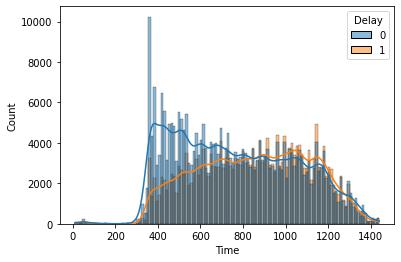

In [18]:
sns.histplot(data=df, x='Time', hue='Delay', kde=True)

<AxesSubplot:xlabel='Length', ylabel='Count'>

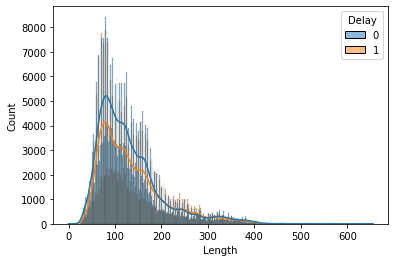

In [19]:
sns.histplot(data=df, x='Length', hue='Delay', kde=True)

In [20]:
lt = df['Length'].quantile(0.99)
print(lt)

368.0


# CATEGORICAL DATA VISUALIZATION AND DATA CLEANING

In [21]:
df.columns

Index(['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time',
       'Length', 'Delay'],
      dtype='object')

<AxesSubplot:xlabel='Airline', ylabel='count'>

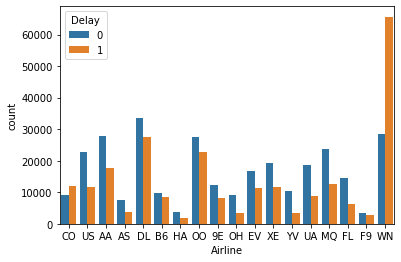

In [22]:
sns.countplot(data=df, x='Airline', hue='Delay')

<AxesSubplot:xlabel='AirportFrom', ylabel='count'>

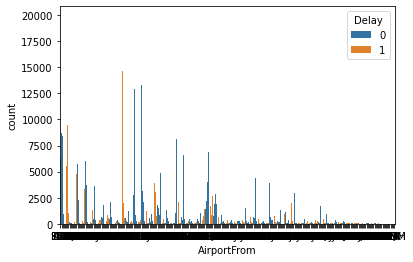

In [23]:
sns.countplot(data=df, x='AirportFrom', hue='Delay')

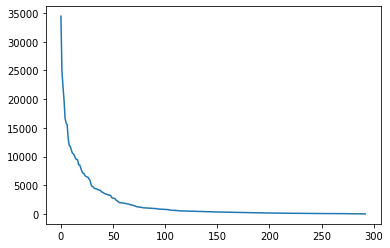

In [24]:
airfrom = df['AirportFrom'].value_counts()
plt.plot(range(len(airfrom)), airfrom)

In [25]:
df['AirportFrom'] = df['AirportFrom'].apply(lambda s: s if str(s) in airfrom[:50] else 'others')

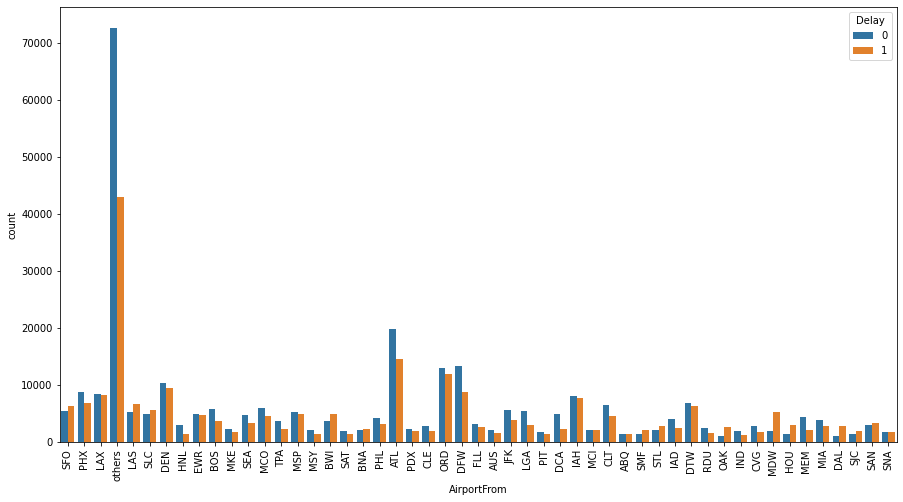

In [26]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='AirportFrom', hue='Delay')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='AirportTo', ylabel='count'>

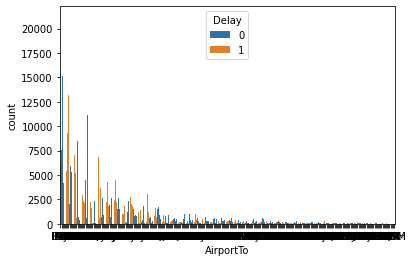

In [27]:
sns.countplot(data=df, x='AirportTo', hue='Delay')

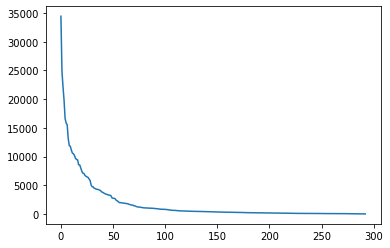

In [28]:
airto = df['AirportTo'].value_counts()
plt.plot(range(len(airto)), airto)

In [29]:
df['AirportTo'] = df['AirportTo'].apply(lambda s: s if str(s) in airto[:50] else 'others')

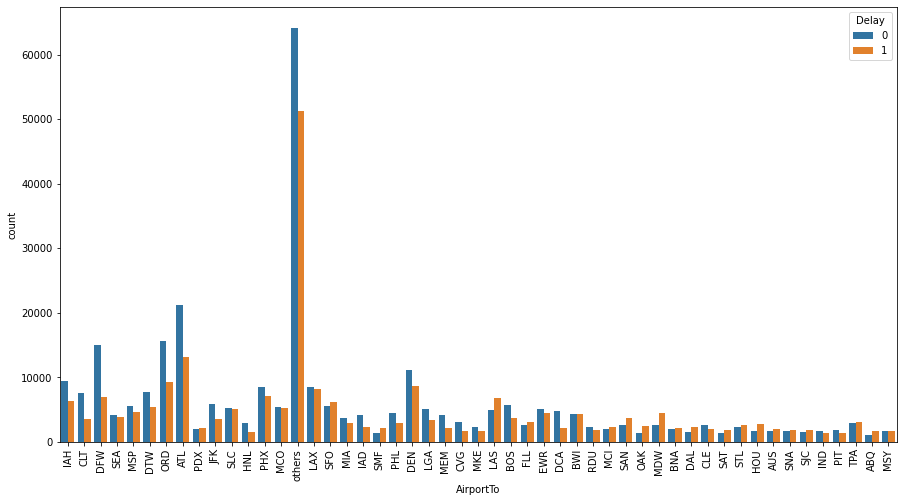

In [30]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='AirportTo', hue='Delay')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

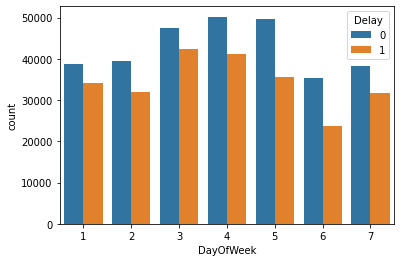

In [31]:
sns.countplot(data=df, x='DayOfWeek', hue='Delay')

# DATA PREPROCESSING

In [32]:
X_cat = df[['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek']]
X_num = df.drop(['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Delay'], axis=1)

In [33]:
X_cat = pd.get_dummies(X_cat, drop_first=True)

In [34]:
X_cat

,DayOfWeek,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_FL,Airline_HA,...,AirportTo_SAT,AirportTo_SEA,AirportTo_SFO,AirportTo_SJC,AirportTo_SLC,AirportTo_SMF,AirportTo_SNA,AirportTo_STL,AirportTo_TPA,AirportTo_others
0,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
539379,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
539380,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
539381,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['Delay']

In [37]:
X.head()

,Flight,Time,Length,DayOfWeek,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,...,AirportTo_SAT,AirportTo_SEA,AirportTo_SFO,AirportTo_SJC,AirportTo_SLC,AirportTo_SMF,AirportTo_SNA,AirportTo_STL,AirportTo_TPA,AirportTo_others
0,-1.044258,-2.833092,1.038237,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.420778,-2.833092,1.280689,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.013509,-2.815110,0.467761,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.018415,-2.815110,0.895618,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.122133,-2.779144,0.995451,3,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
X.isna().sum()

Flight              0
Time                0
Length              0
DayOfWeek           0
Airline_AA          0
                   ..
AirportTo_SMF       0
AirportTo_SNA       0
AirportTo_STL       0
AirportTo_TPA       0
AirportTo_others    0
Length: 121, dtype: int64

# BUILDING MODEL

**LogisticRegression**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [42]:
model_lr = LogisticRegression(solver='liblinear')

In [43]:
param = {'penalty':['l1', 'l2'], 'C':[0.01, 0.1, 1, 5], 'tol':[1e-2,1,1e2]}

In [44]:
n_cpu=os.cpu_count()
print("The number of cpus: ",n_cpu)
n_thread=n_cpu*2
print("Expected number of threads:",n_thread)

The number of cpus:  4
Expected number of threads: 8


In [45]:
GSLR=GridSearchCV(model_lr,param,cv=6,n_jobs=n_thread,scoring="accuracy")

In [46]:
GSLR.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=LogisticRegression(solver='liblinear'), n_jobs=8,
             param_grid={'C': [0.01, 0.1, 1, 5], 'penalty': ['l1', 'l2'],
                         'tol': [0.01, 1, 100.0]},
             scoring='accuracy')

In [47]:
print('best_param:', GSLR.best_params_)
print('best_score:', GSLR.best_score_)

best_param: {'C': 1, 'penalty': 'l2', 'tol': 0.01}
best_score: 0.6411878125264853


In [48]:
pred = GSLR.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71     89680
           1       0.63      0.47      0.54     72135

    accuracy                           0.64    161815
   macro avg       0.64      0.62      0.62    161815
weighted avg       0.64      0.64      0.63    161815



**DecisionTreeClassifier**

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model_dt = DecisionTreeClassifier()

In [51]:
param={'criterion':['gini','entropy'],'min_samples_split':[5,10], 'max_depth':[None,2],'min_samples_leaf':[1,10],'max_features':[None,'sqrt','log2']}

In [52]:
GSDT = GridSearchCV(model_dt, param, cv=5, n_jobs=n_thread, scoring='accuracy')

In [53]:
GSDT.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 10],
                         'min_samples_split': [5, 10]},
             scoring='accuracy')

In [54]:
print('best param:', GSDT.best_params_)
print('best score:', GSDT.best_score_)

best param: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10}
best score: 0.6467497248677527


In [55]:
pred = GSDT.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71     89680
           1       0.63      0.51      0.56     72135

    accuracy                           0.65    161815
   macro avg       0.65      0.64      0.63    161815
weighted avg       0.65      0.65      0.64    161815

